In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

### Set Path for storing results

In [2]:
import datetime
import os

now = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
MC_run_results_path = os.path.join("3_mc_results", f"MC_run_{now}")
if not os.path.exists(MC_run_results_path):
    os.makedirs(MC_run_results_path)

### Simulate Experimental Data

In [3]:
from clustering.input_data.simulated_experiment_class import SimulatedExperiment, SimulatedExperimentParameter

n_experiments = 10
exp_params = {
    'store_data': True,
    'path_to_store_data': os.path.join(MC_run_results_path, "datasets"),
    'min_datapoints': 5,
    'cluster_number_range': (1, 2),
    'cluster': {
        'cluster_size_range': (1, 100),
        'exp_scale_range': (0.001, 1),
        'norm_loc_range': (0.5, 7),
        'norm_scale_range': (0.1, 1)
        }
  }
  
experiment_data = [SimulatedExperiment(str(i), **exp_params)  for i in range(n_experiments)]


### Run Clustering

In [4]:
from clustering.clustering_class import EMClustering
mc_params = {
    "save_data": True,
    "path_to_save": MC_run_results_path,
    "parallel": {
        "n_jobs": 10,
        "verbose": 11
    },

    "em": {
        "em_algorithm": {
            "max_iter": 200,
            "em_tol": 1e-5,
            "min_mix_coef": 0.02
        }
    },

    "cluster_init": {
        "init_routine": "OPTICS",
        "routine":{
            "N_cluster_max": 4,
            "N_runs_per_clusternumber": 1
        }

    }
}

mc = EMClustering(**mc_params)
mc.load_experiments(experiment_data)

In [5]:
mc.run()



[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    6.1s remaining:   24.6s
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    6.8s remaining:   16.0s
[Parallel(n_jobs=10)]: Done   4 out of  10 | elapsed:    7.1s remaining:   10.7s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    8.4s remaining:    8.4s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    9.8s remaining:    6.5s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:   10.4s remaining:    4.4s
[Parallel(n_jobs=10)]: Done   8 out of  10 | elapsed:   11.2s remaining:    2.7s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   12.2s finished


In [7]:
mc.save_results()

PermissionError: [WinError 32] Der Prozess kann nicht auf die Datei zugreifen, da sie von einem anderen Prozess verwendet wird: '1_logs\\Clustering.log'

In [11]:
from clustering.model_selection.criteria.scoreboard import create_scoreboard
df_results, model_data = mc.df_results, mc.model_data
df_scores, df_scores_na = create_scoreboard(df_results, model_data)

In [18]:
model_data.keys()

dict_keys(['inferred_mixtures', 'starting_values', 'datasets', 'init_routine'])

In [25]:
inferred_mixtures = {model_idx: list(inf_mixture) for model_idx, inf_mixture in enumerate(model_data["inferred_mixtures"])}
starting_values = {model_idx: list(starting_values) for model_idx, starting_values in enumerate(model_data["starting_values"])}
inferred_mixtures

{0: [1.0, 0.01042493909725094, 2.9461014159148573, 0.20129712720005055],
 1: [1.0, 0.010425071601966913, 2.94610039136001, 0.20128763932759464],
 2: [1.0, 0.010425082327483902, 2.94610130966486, 0.20129095748052625],
 3: [1.0, 0.010425082225195009, 2.9460989286380785, 0.20129044831303455],
 4: [0.2654062804430681,
  0.007857134018122039,
  2.987641327375008,
  0.09010155551429051,
  0.7345937195569324,
  0.011352264852975802,
  2.9311159681696117,
  0.22663990423211472],
 5: [0.26443921130120474,
  0.007870659976639214,
  2.9880337665658194,
  0.0897753595107061,
  0.7355607886987949,
  0.011342546587616145,
  2.9310448183997506,
  0.22652820224250425],
 6: [0.9011537559827578,
  0.009699814100101576,
  2.919728310048604,
  0.17555250231144207,
  0.09884624401724194,
  0.017039005703767197,
  3.1866218013992422,
  0.2544314601945847],
 7: [0.05652904243229721,
  0.017353729689931173,
  3.331471446091625,
  0.20191791602634063,
  0.9434709575677028,
  0.010009913551095474,
  2.923010938

In [24]:
df_scores

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,N_cluster,ll_score,...,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank
2,2,3,0.083632,0.083632,3,2,0,0,1,326.042185,...,0.615726,1,1,1,1,7,8,9,19,1
3,3,2,0.063175,0.063175,2,3,0,0,1,326.042185,...,0.615726,2,2,2,2,7,8,10,23,2
7,7,200,2.645181,2.645181,200,7,0,0,2,319.051935,...,0.755613,5,5,5,5,1,6,1,27,3
1,1,2,0.044946,0.044946,2,1,0,0,1,326.042185,...,0.615726,3,3,3,3,7,8,11,27,3
6,6,200,2.749673,2.749673,200,6,0,0,2,308.232087,...,0.744658,6,6,6,6,1,6,2,31,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,183,3.288120,3.288120,183,13,0,9,4,88.086195,...,0.441222,10,10,10,10,3,4,10,47,10
116,116,2,0.031014,0.031014,2,1,0,9,1,28.988946,...,0.322050,11,11,11,11,4,5,11,53,11
118,118,2,0.060307,0.060307,2,3,0,9,1,28.988946,...,0.322050,12,12,12,12,4,5,12,57,12
117,117,2,0.043208,0.043208,2,2,0,9,1,28.988946,...,0.322050,13,13,13,13,4,5,13,61,13


pickle results if needed

### Model Selection

In [ ]:
from clustering.model_selection.criteria.scoreboard import create_scoreboard

df_scores, df_scores_na = create_scoreboard(df_results, model_data)

#### Include data from true models

In [ ]:
from mc_simulation.post_processing_true_models import include_true_clusternumber, include_prediction_quality_measures

df_scores = include_true_clusternumber(df_scores, model_data)
df_scores = include_prediction_quality_measures(df_scores, mc.model_data)

## Inspect results

In [ ]:
pd.set_option('display.max_columns', 20)
dataset = 3
criterion = "AIC_score"

df_select = df_scores.loc[(df_scores.dataset == str(dataset)), :].sort_values(criterion)
#df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
df_select.head(5)

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,N_cluster,ll_score,...,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,True_N_Cluster,number_identified_cluster,adjusted_rand_score
65,65,10,0.282113,0.282113,10,5,0,3,2,-156.740248,...,1,1,1,1,1,6,1,4,2.0,0.59608
68,68,8,0.256150,0.256150,8,8,0,3,2,-156.891944,...,2,2,1,1,2,10,2,4,2.0,0.59608
67,67,8,0.225635,0.228023,9,7,1,3,2,-158.094102,...,3,3,1,1,3,14,3,4,2.0,0.59608
69,69,20,0.574307,0.574307,20,9,0,3,2,-158.784121,...,4,4,1,1,4,18,4,4,2.0,0.59608
66,66,15,0.249985,0.252252,16,6,1,3,2,-159.291431,...,5,5,1,1,5,22,5,4,2.0,0.59608


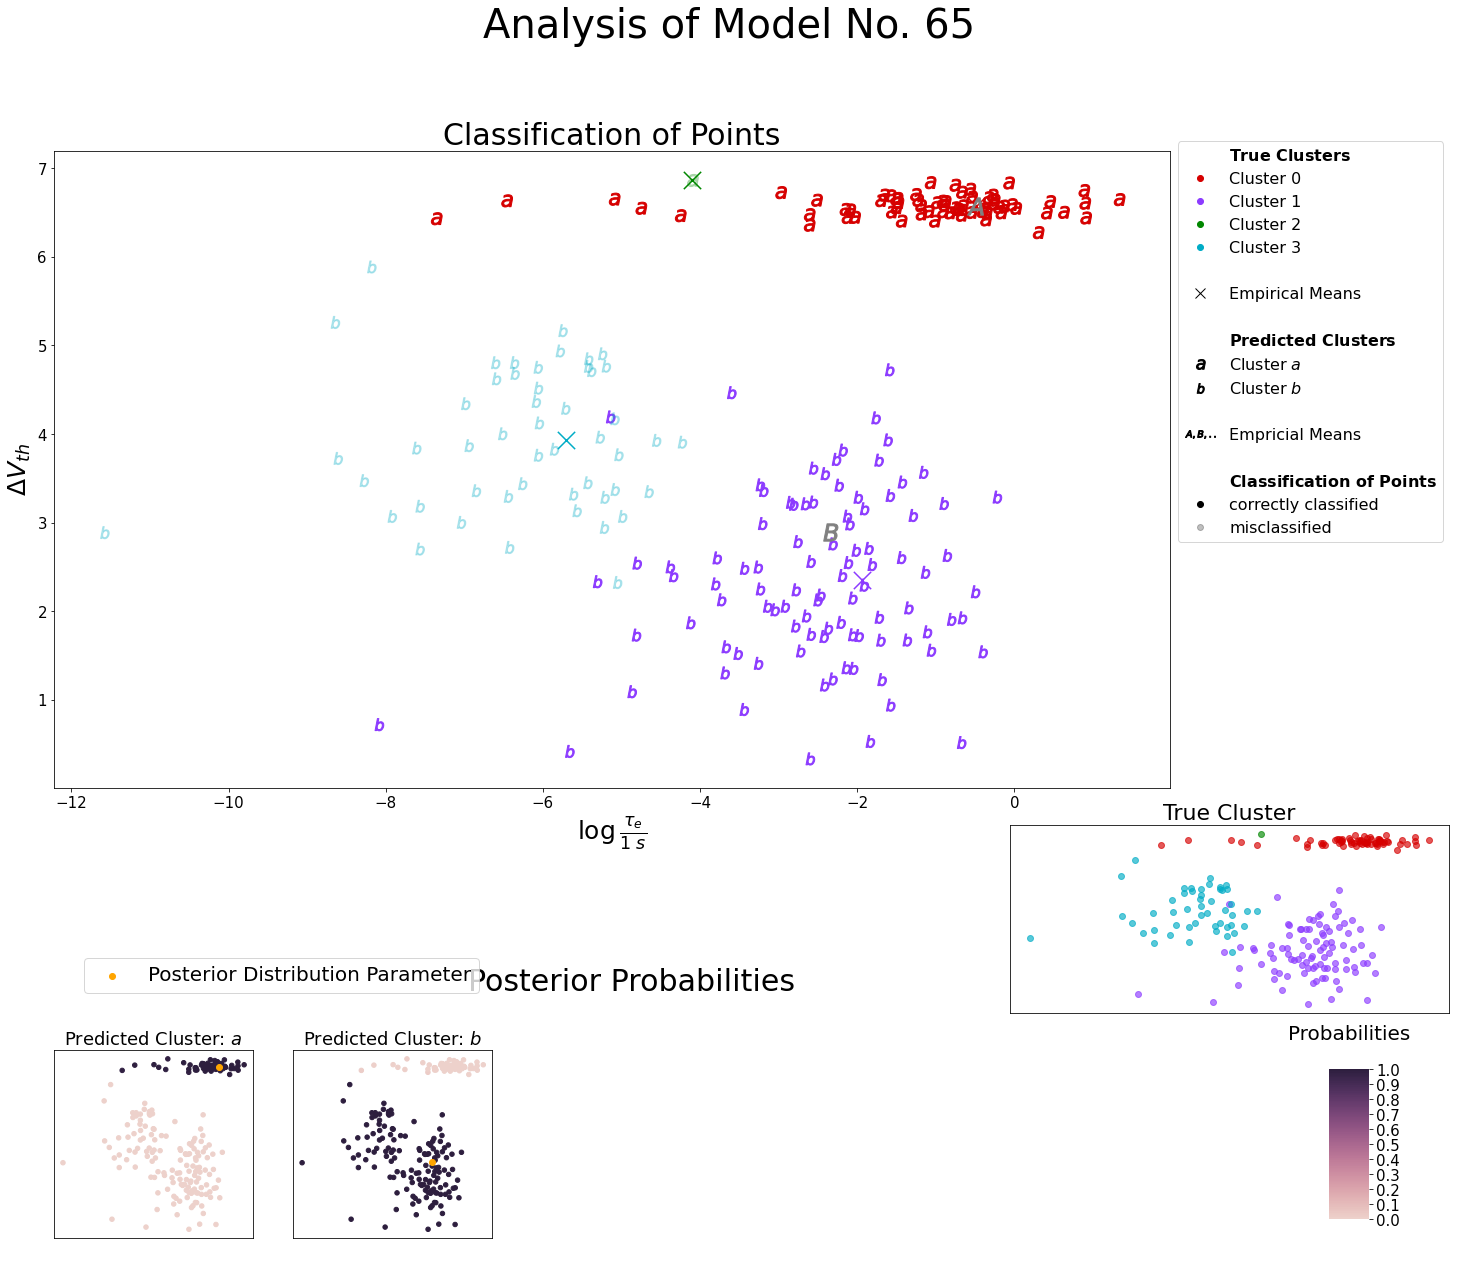

In [ ]:
from plotting.clustering_assessment.plot import plot_clustering_assessment
model_idx = 65

fig = plot_clustering_assessment(model_data, df_scores, model_idx)
fig